# Iris Species Classification

#### This is a simple machine learning task using a few ML algorithms that I am aware of to gain better understanding of tasks in Python. I will be using the famous Iris dataset for classification task. 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#### Let's import the dataset and check its contents.

In [19]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Let's try to check info about data types in data.

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### And then some basic statistics.

In [21]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Remove the unnecessary column Id.

In [22]:
iris.drop("Id", axis=1, inplace= True) 
#Axis 1 specifies columnwise dropping and inplace True makes sure changes are reflected in the original dataframe.

#### Let's perform some visual data analysis to get to know the data.

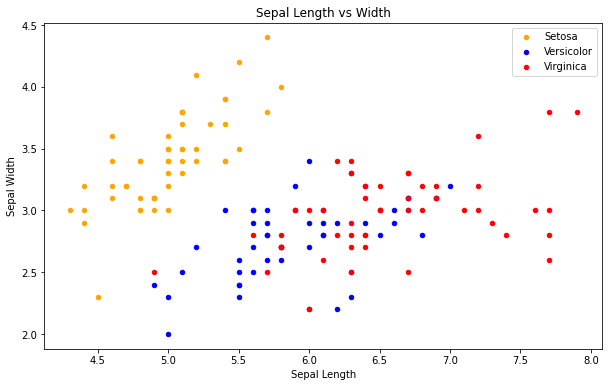

In [23]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind="scatter", x= "SepalLengthCm", y="SepalWidthCm", color="orange", label = "Setosa")
iris[iris.Species == 'Iris-versicolor'].plot(kind="scatter", x= "SepalLengthCm", y="SepalWidthCm", color="blue", label = "Versicolor", ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind="scatter", x= "SepalLengthCm", y="SepalWidthCm", color="red", label = "Virginica", ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph represents the relation between the different species' Sepal Width and Sepal Length.

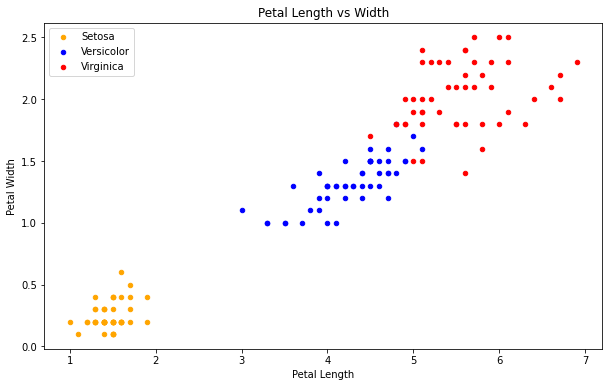

In [24]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind="scatter", x= "PetalLengthCm", y="PetalWidthCm", color="orange", label = "Setosa")
iris[iris.Species == 'Iris-versicolor'].plot(kind="scatter", x= "PetalLengthCm", y="PetalWidthCm", color="blue", label = "Versicolor", ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind="scatter", x= "PetalLengthCm", y="PetalWidthCm", color="red", label = "Virginica", ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length vs Width")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph represents the relation between the different species' Petal Width and Petal Length, where it is quite evident that Petal features are able
to better distinguish between the different species.

#### Now we shall check the distribution of the continuous variables we have.

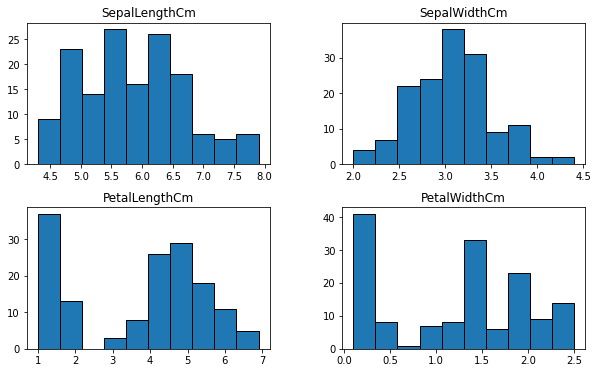

In [25]:
iris.hist(grid=False, edgecolor="black")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

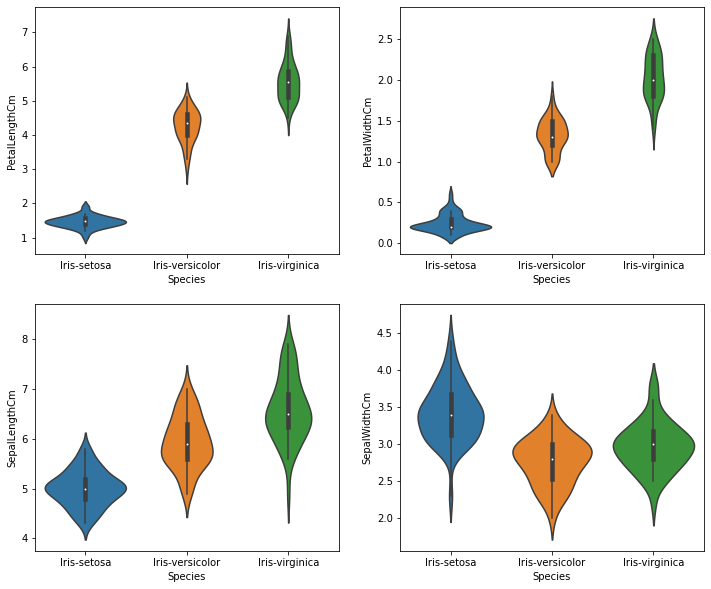

In [26]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sb.violinplot(x = 'Species',y='PetalLengthCm', data=iris)
plt.subplot(2,2,2)
sb.violinplot(x = 'Species',y='PetalWidthCm', data=iris)
plt.subplot(2,2,3)
sb.violinplot(x = 'Species',y='SepalLengthCm', data=iris)
plt.subplot(2,2,4)
sb.violinplot(x = 'Species',y='SepalWidthCm', data=iris)

The violinplot shows almost everything that a box plot does plus the probability distribution of that category.  

Since the original task was of classification, now we will focus on classification algorithms to train a model and check its performance.

In [27]:
#Importing ML packages for dataset partition and multiple algorithms
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

#### Let's check the correlation between the variables here.

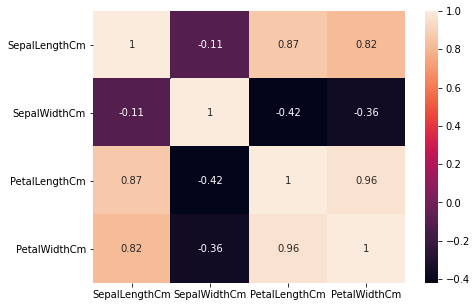

In [28]:
plt.figure(figsize=(7,5))
sb.heatmap(iris.corr(),annot=True)
plt.show()

From what we see, Sepal Length and Sepal Width are not positively correlated but Petal Length and Petal Width are highly correlated. 

#### Steps for ML application on dataset
1. Split dataset into test and train.
2. Choosing algorithm.
3. Train the algorithm on train dataset using fit().
4. Use test data to assess model predictions using predict().
5. Model metrics like accuracy and other metrics to be evaluated.

#### Splitting

In [29]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [30]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

#### SVM

In [31]:
model = svm.SVC(gamma = 'auto')
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('Accuracy of SVM is:', round(metrics.accuracy_score(prediction, test_y),3))

Accuracy of SVM is: 0.956


#### Decision Tree

In [32]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('Accuracy of Decision Tree is:', round(metrics.accuracy_score(prediction, test_y),3))

Accuracy of Decision Tree is: 0.978


#### kNN

In [33]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('Accuracy of kNN is:', round(metrics.accuracy_score(prediction, test_y),3))

Accuracy of kNN is: 0.956


#### Logistic Regression

In [34]:
model = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('Accuracy of Logistic Regression is:', round(metrics.accuracy_score(prediction, test_y),3))

Accuracy of Logistic Regression is: 0.978


Out of the performed algorithms, decision tree was very slightly lagging in accuracy otherwise everyone gave a good performance since this dataset is very nearly perfect.

I shall cover advanced data handling in the following notebooks. Till then, see you.